In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# User-based recommendations

In [2]:
# the file is in a Box folder (each movie has at least 2000 ratings)
ratings = pd.read_csv('ratings_large.csv')
ratings

,userId,movieId,rating,timestamp,title
0,4,1,4.0,1113765937,Toy Story (1995)
1,4,2,4.0,1113767306,Jumanji (1995)
2,4,5,2.0,1123990453,Father of the Bride Part II (1995)
3,4,6,4.5,1113767242,Heat (1995)
4,4,10,4.0,1113765995,GoldenEye (1995)
...,...,...,...,...,...
10395149,283224,1388,2.0,851001995,Jaws 2 (1978)
10395150,283224,1394,3.0,851002354,Raising Arizona (1987)
10395151,283224,1396,3.0,851002354,Sneakers (1992)
10395152,283224,2019,5.0,851000812,Seven Samurai (Shichinin no samurai) (1954)


In [3]:
# (transposed) ratings matrix
ratings_matrix = ratings.pivot('userId','title')['rating'].T
ratings_matrix

userId,4,19,42,43,51,55,56,71,73,79,...,283153,283164,283165,283170,283183,283184,283185,283195,283204,283224
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.5,NaN,...,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,4.0,...,3.0,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN
101 Dalmatians (1996),NaN,NaN,4.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,3.5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.5,NaN,NaN
12 Angry Men (1957),1.5,5.0,NaN,4.5,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,...,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.5,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# pick a userId
user = 4
user_ratings = ratings_matrix.loc[:,user]
user_ratings

title
(500) Days of Summer (2009)                               NaN
10 Things I Hate About You (1999)                         NaN
101 Dalmatians (1996)                                     NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)    NaN
12 Angry Men (1957)                                       1.5
                                                         ... 
Zoolander (2001)                                          NaN
Zootopia (2016)                                           NaN
eXistenZ (1999)                                           3.5
xXx (2002)                                                3.5
¡Three Amigos! (1986)                                     3.0
Name: 4, Length: 1344, dtype: float64

In [5]:
# number of ratings
np.sum(user_ratings.notna())

532

In [6]:
# ratings distribution
user_ratings.value_counts(dropna=False)

NaN    812
4.0    126
3.5     97
4.5     90
5.0     60
3.0     46
2.5     34
2.0     34
0.5     27
1.0      9
1.5      9
Name: 4, dtype: int64

In [7]:
# user top movies
user_ratings.sort_values(ascending=False).head(20)

title
Shrek (2001)                                                     5.0
Batman Begins (2005)                                             5.0
Incredibles, The (2004)                                          5.0
Rock, The (1996)                                                 5.0
Insomnia (2002)                                                  5.0
Spider-Man (2002)                                                5.0
Spider-Man 2 (2004)                                              5.0
Road to Perdition (2002)                                         5.0
Spy Game (2001)                                                  5.0
Clear and Present Danger (1994)                                  5.0
Traffic (2000)                                                   5.0
Pulp Fiction (1994)                                              5.0
Kung Fu Hustle (Gong fu) (2004)                                  5.0
L.A. Confidential (1997)                                         5.0
Last Samurai, The (2003)    

In [8]:
# user bottom movies
user_ratings.sort_values().head(20)

title
Napoleon Dynamite (2004)                  0.5
Showgirls (1995)                          0.5
Spy Kids (2001)                           0.5
Royal Tenenbaums, The (2001)              0.5
Beavis and Butt-Head Do America (1996)    0.5
Super Mario Bros. (1993)                  0.5
Big Lebowski, The (1998)                  0.5
Titanic (1997)                            0.5
Bio-Dome (1996)                           0.5
Blair Witch Project, The (1999)           0.5
Blues Brothers, The (1980)                0.5
Sleepless in Seattle (1993)               0.5
Miss Congeniality (2000)                  0.5
Breakfast Club, The (1985)                0.5
Bridget Jones's Diary (2001)              0.5
Moulin Rouge (2001)                       0.5
Cable Guy, The (1996)                     0.5
Dude, Where's My Car? (2000)              0.5
Dumb & Dumber (Dumb and Dumber) (1994)    0.5
Eyes Wide Shut (1999)                     0.5
Name: 4, dtype: float64

In [9]:
# user mean rating
user_mean = user_ratings.mean()
user_mean

3.5253759398496243

In [10]:
# user standard deviation rating
user_std = user_ratings.std()
user_std

1.1591017244209465

In [11]:
# drop user column from the ratings matrix
ratings_matrix.drop(user,axis=1,inplace=True)

## The z-scores matrix

In [12]:
z_scores = (ratings_matrix - ratings_matrix.mean())/ratings_matrix.std()
z_scores

userId,19,42,43,51,55,56,71,73,79,81,...,283153,283164,283165,283170,283183,283184,283185,283195,283204,283224
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,0.441226,NaN,NaN,NaN,NaN,-1.447012,0.883303,NaN,-0.337638,...,NaN,NaN,NaN,-0.552253,NaN,0.258297,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,-1.913005,NaN,NaN,NaN,-0.311645,-0.337638,...,0.197451,NaN,1.846808,NaN,NaN,NaN,NaN,-1.542636,NaN,NaN
101 Dalmatians (1996),NaN,0.441226,NaN,NaN,NaN,-2.040622,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,-0.111992,-1.576142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.538664,0.772019,NaN,NaN
12 Angry Men (1957),1.905267,NaN,0.523548,1.245453,NaN,1.210739,NaN,NaN,NaN,1.501957,...,NaN,NaN,0.006166,NaN,NaN,NaN,NaN,NaN,NaN,1.290966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,-0.182702,NaN,-1.694737,NaN,-0.337638,...,0.197451,NaN,NaN,NaN,NaN,-1.559117,NaN,-0.385309,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Similarities

In [13]:
# correlations
correlations = ratings_matrix.corrwith(user_ratings)

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [14]:
# similarities
alpha = 2
similarities = correlations**alpha

In [15]:
similarities

userId
19        0.025325
42        0.044484
43        0.005913
51        0.002969
55        0.012506
            ...   
283184    0.074948
283185    0.055915
283195    0.067580
283204    0.280876
283224    0.084289
Length: 35288, dtype: float64

## Prediction function

In [16]:
# number of nearest neighbors
k = 10

# item
item = "League of Extraordinary Gentlemen, The (a.k.a. LXG) (2003)"# '300 (2007)'

# k nearest neighbors similarities
knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)
    
# normalization factor
total = knn_sim.abs().sum()

# k nearest neighbors z-scores
knn_z_scores = z_scores.loc[item,knn_sim.index]

# prediction
prediction = user_mean + user_std*knn_sim.dot(knn_z_scores)/total

print(item+': '+str(np.round(prediction,1)))

League of Extraordinary Gentlemen, The (a.k.a. LXG) (2003): 2.0


## Fake user

In [10]:
# fake user likes sci-fi films, action-adventures films, and doesn't like romance films, kid movies
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fake_user.csv'
fake_user = pd.read_csv(url,index_col='title', squeeze=True)
fake_user

title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Name: rating, Length: 1344, dtype: float64

In [16]:
fake_user.sort_values().head(20)

title
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.5
Grease (1978)                                           0.5
Notebook, The (2004)                                    0.5
How to Train Your Dragon (2010)                         0.5
Titanic (1997)                                          0.5
Frozen (2013)                                           0.5
Toy Story 3 (2010)                                      0.5
Harry Potter and the Goblet of Fire (2005)              0.5
Sound of Music, The (1965)                              0.5
It's a Wonderful Life (1946)                            0.5
Twilight (2008)                                         0.5
Meet Joe Black (1998)                                   0.5
K-PAX (2001)                                            0.5
Harry Potter and the Deathly Hallows: Part 2 (2011)     0.5
Kung Fu Panda (2008)                                    0.5
Princess Mononoke (Mononoke-hime) (1997)                0.5
Lilo & Stitch (2002)              

In [18]:
fake_user_mean = fake_user.mean()
fake_user_std = fake_user.std()

In [19]:
# correlations
correlations = ratings_matrix.corrwith(fake_user)

In [26]:
# similarities
alpha = 1
similarities = correlations**alpha

In [28]:
fake_user_pred = pd.Series(index=fake_user.index)
fake_user_pred

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Length: 1344, dtype: float64

In [29]:
for item in fake_user.index:
    # k nearest neighbors similarities
    knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)

    # normalization factor
    total = knn_sim.abs().sum()

    # k nearest neighbors z-scores
    knn_z_scores = z_scores.loc[item,knn_sim.index]

    # prediction
    prediction = fake_user_mean + fake_user_std*knn_sim.dot(knn_z_scores)/total
    fake_user_pred[item] = prediction

In [30]:
# top 20 recommendations
fake_user_pred.sort_values(ascending=False).head(20)

title
Godfather, The (1972)                                             4.671384
Pulp Fiction (1994)                                               4.507739
Saving Private Ryan (1998)                                        4.478502
Seven (a.k.a. Se7en) (1995)                                       4.472498
Dark Knight, The (2008)                                           4.445347
Fight Club (1999)                                                 4.391022
Lord of the Rings: The Return of the King, The (2003)             4.388813
Great Escape, The (1963)                                          4.369330
Gladiator (2000)                                                  4.354576
Usual Suspects, The (1995)                                        4.348822
Matrix, The (1999)                                                4.344856
Once Upon a Time in the West (C'era una volta il West) (1968)     4.330175
Apocalypse Now (1979)                                             4.290250
Snatch (2000)      

In [31]:
# bottom 20 recommendations
fake_user_pred.sort_values(ascending=False).tail(20)

title
Sound of Music, The (1965)                          0.545212
Mulan (1998)                                        0.496153
Richie Rich (1994)                                  0.477252
Princess Diaries, The (2001)                        0.450707
Titanic (1997)                                      0.448140
Moulin Rouge (2001)                                 0.446303
Brokeback Mountain (2005)                           0.445197
Pocahontas (1995)                                   0.429416
Little Mermaid, The (1989)                          0.428531
Spy Kids (2001)                                     0.423566
Runaway Bride (1999)                                0.388926
Super Mario Bros. (1993)                            0.380189
Grease (1978)                                       0.371896
Frozen (2013)                                       0.335317
Bridget Jones's Diary (2001)                        0.326948
Free Willy (1993)                                   0.322994
Harry Potter and t

## The impact of the long tail

In [3]:
n_ratings = ratings.groupby('title')['rating'].count()

In [4]:
n_ratings.sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                                                               29095
Matrix, The (1999)                                                                28917
Pulp Fiction (1994)                                                               28128
Star Wars: Episode IV - A New Hope (1977)                                         27398
Silence of the Lambs, The (1991)                                                  26916
Shawshank Redemption, The (1994)                                                  26635
Star Wars: Episode V - The Empire Strikes Back (1980)                             26582
Jurassic Park (1993)                                                              26423
Back to the Future (1985)                                                         26305
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    25597
Name: rating, dtype: int64

In [5]:
n_ratings.sort_values().head(10)

title
Up Close and Personal (1996)       1549
Juror, The (1996)                  1671
When a Man Loves a Woman (1994)    1918
Little Princess, A (1995)          2040
Richard III (1995)                 2109
Nixon (1995)                       2127
Sgt. Bilko (1996)                  2142
Milk Money (1994)                  2159
Murder in the First (1995)         2234
Beverly Hillbillies, The (1993)    2235
Name: rating, dtype: int64

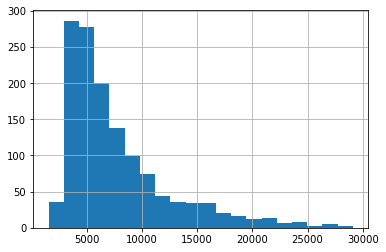

In [6]:
n_ratings.hist(bins=20)

In [40]:
n_ratings

title
(500) Days of Summer (2009)                               6030
10 Things I Hate About You (1999)                         8385
101 Dalmatians (1996)                                     5327
101 Dalmatians (One Hundred and One Dalmatians) (1961)    6326
12 Angry Men (1957)                                       9469
                                                          ... 
Zoolander (2001)                                          8618
Zootopia (2016)                                           4031
eXistenZ (1999)                                           4437
xXx (2002)                                                5112
¡Three Amigos! (1986)                                     5166
Name: rating, Length: 1344, dtype: int64

In [7]:
n_users = len(ratings['userId'].unique())
n_users

35289

In [8]:
weights = np.log(n_users/n_ratings)
weights

title
(500) Days of Summer (2009)                               1.766824
10 Things I Hate About You (1999)                         1.437127
101 Dalmatians (1996)                                     1.890783
101 Dalmatians (One Hundred and One Dalmatians) (1961)    1.718903
12 Angry Men (1957)                                       1.315548
                                                            ...   
Zoolander (2001)                                          1.409718
Zootopia (2016)                                           2.169557
eXistenZ (1999)                                           2.073593
xXx (2002)                                                1.931981
¡Three Amigos! (1986)                                     1.921473
Name: rating, Length: 1344, dtype: float64

In [74]:
def weighted_corr(y):
    
    # we'll use some pandas built-in functions (they are more nan friendly than numpy function)
    
    x = fake_user
    
    # mask missing values
    x = x + 0*y
    y = y + 0*x
    
    # means
    mean_x = x.mean()
    mean_y = y.mean()
    
    # denominator
    den1 = np.sqrt((weights*(x-mean_x)**2).sum())
    den2 = np.sqrt((weights*(y-mean_y)**2).sum())
    den = den1*den2
    
    # numerator
    num = (weights*(x-mean_x)*(y-mean_y)).sum()
    
    return num/den

In [91]:
similarities = ratings_matrix.apply(weighted_corr)

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


In [93]:
fake_user_pred = pd.Series(index=fake_user.index)
for item in fake_user.index:
    
    # k nearest neighbors similarities
    knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)

    # normalization factor
    total = knn_sim.abs().sum()

    # k nearest neighbors z-scores
    knn_z_scores = z_scores.loc[item,knn_sim.index]

    # prediction
    prediction = fake_user_mean + fake_user_std*knn_sim.dot(knn_z_scores)/total
    fake_user_pred[item] = prediction

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [94]:
# top 20 recommendations
fake_user_pred.sort_values(ascending=False).head(20)

title
Pulp Fiction (1994)                                              4.631599
Blade Runner (1982)                                              4.599847
Usual Suspects, The (1995)                                       4.558908
Evil Dead, The (1981)                                            4.490470
Shawshank Redemption, The (1994)                                 4.451552
Dark Knight, The (2008)                                          4.427401
Gladiator (2000)                                                 4.402263
Reservoir Dogs (1992)                                            4.359706
Seven (a.k.a. Se7en) (1995)                                      4.350348
Godfather, The (1972)                                            4.289680
Saving Private Ryan (1998)                                       4.273889
Silence of the Lambs, The (1991)                                 4.271033
Departed, The (2006)                                             4.212279
Goodfellas (1990)               

In [95]:
# bottom 20 recommendations
fake_user_pred.sort_values(ascending=False).tail(20)

title
Super Mario Bros. (1993)                               0.596037
Ratatouille (2007)                                     0.571954
Runaway Bride (1999)                                   0.570845
Harry Potter and the Deathly Hallows: Part 2 (2011)    0.554353
Muppet Treasure Island (1996)                          0.520767
13 Going on 30 (2004)                                  0.513086
Legally Blonde (2001)                                  0.497658
Sound of Music, The (1965)                             0.485927
Little Mermaid, The (1989)                             0.458193
Grease (1978)                                          0.450103
Free Willy (1993)                                      0.446157
Bridget Jones's Diary (2001)                           0.436378
Princess Diaries, The (2001)                           0.403735
Spy Kids (2001)                                        0.371874
Moulin Rouge (2001)                                    0.343505
Frozen (2013)                     